In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
data = pd.read_csv("C:\\Users\\china\\Btech_ML\\self-machle\\Dataset\\02_2023.csv")

In [3]:
data.head()

,Entry Date,Entry Hour,entry_lineid_sttnid,Entry TCK_MAIN_TP,Entry Count,Entry Station Code,Month-Year
0,01-02-2023,0,01_01,01,0,MYP,02-2023
1,01-02-2023,0,01_01,02,0,MYP,02-2023
2,01-02-2023,5,01_01,01,76,MYP,02-2023
3,01-02-2023,5,01_01,02,15,MYP,02-2023
4,01-02-2023,6,01_01,01,379,MYP,02-2023


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201274 entries, 0 to 201273
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Entry Date           201274 non-null  object
 1   Entry Hour           201274 non-null  int64 
 2   entry_lineid_sttnid  201274 non-null  object
 3   Entry TCK_MAIN_TP    201274 non-null  object
 4   Entry Count          201274 non-null  int64 
 5   Entry Station Code   201274 non-null  object
 6   Month-Year           201274 non-null  object
dtypes: int64(2), object(5)
memory usage: 10.7+ MB


In [5]:
data["Entry Date"] = pd.to_datetime(data["Entry Date"],format="%d-%m-%Y")

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201274 entries, 0 to 201273
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Entry Date           201274 non-null  datetime64[ns]
 1   Entry Hour           201274 non-null  int64         
 2   entry_lineid_sttnid  201274 non-null  object        
 3   Entry TCK_MAIN_TP    201274 non-null  object        
 4   Entry Count          201274 non-null  int64         
 5   Entry Station Code   201274 non-null  object        
 6   Month-Year           201274 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 10.7+ MB


In [7]:
data["Datetime"] = data["Entry Date"] + pd.to_timedelta(data["Entry Hour"], unit='h')

In [8]:
df = data.drop(columns=["Month-Year","Entry TCK_MAIN_TP","Entry Date","Entry Hour"])

In [9]:
df 

,entry_lineid_sttnid,Entry Count,Entry Station Code,Datetime
0,01_01,0,MYP,2023-02-01 00:00:00
1,01_01,0,MYP,2023-02-01 00:00:00
2,01_01,76,MYP,2023-02-01 05:00:00
3,01_01,15,MYP,2023-02-01 05:00:00
4,01_01,379,MYP,2023-02-01 06:00:00
...,...,...,...,...
201269,03_23,0,RDG,2023-02-18 00:00:00
201270,03_23,0,RDG,2023-02-18 00:00:00
201271,03_23,0,RDG,2023-02-18 00:00:00
201272,03_23,0,RDG,2023-02-18 00:00:00


<AxesSubplot:title={'center':'Total Passenger Entries Over Time'}, xlabel='Datetime'>

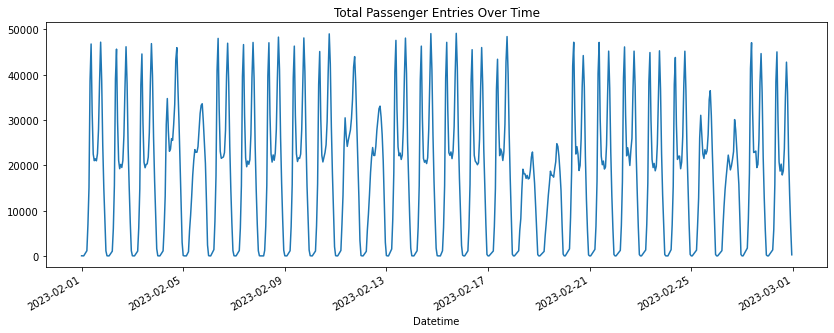

In [10]:
# Total passenger count over time
df.groupby("Datetime")["Entry Count"].sum().plot(figsize=(14, 5), title="Total Passenger Entries Over Time")

<AxesSubplot:title={'center':'Total Entries by Station'}, ylabel='Entry Station Code'>

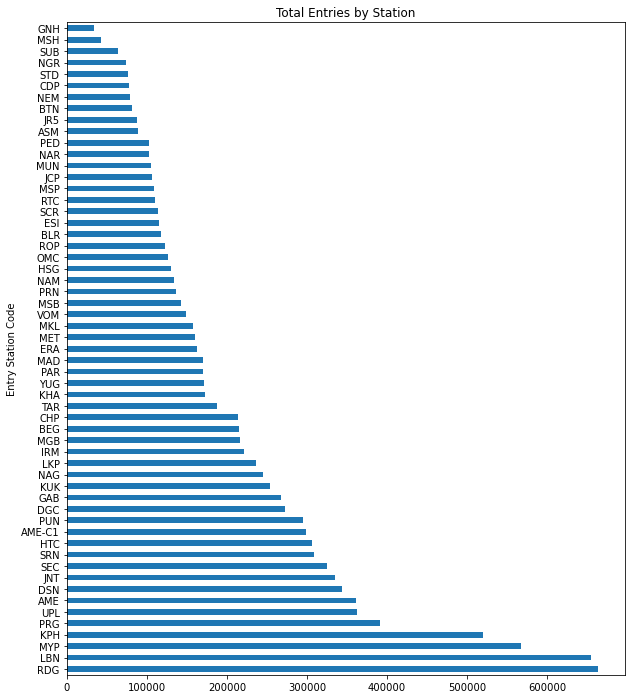

In [11]:
# Total entries per station
df.groupby("Entry Station Code")["Entry Count"].sum().sort_values(ascending=False).plot(
    kind="barh", figsize=(10, 12), title="Total Entries by Station"
)


<AxesSubplot:title={'center':'Average Entry Count by Hour of Day'}, xlabel='Hour'>

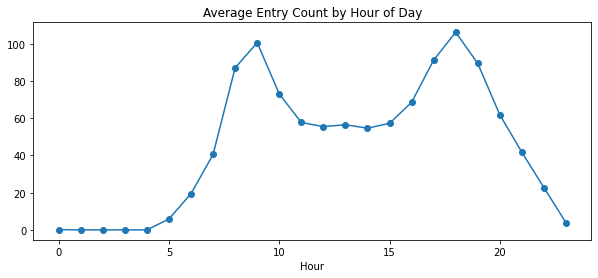

In [12]:
df["Hour"] = df["Datetime"].dt.hour
df.groupby("Hour")["Entry Count"].mean().plot(
    marker='o', title="Average Entry Count by Hour of Day", figsize=(10, 4)
)

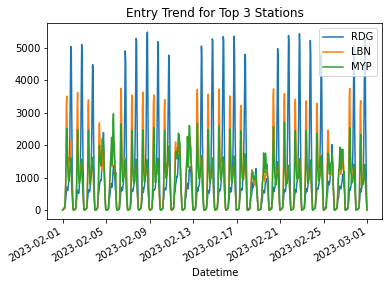

In [13]:
top_stations = df["Entry Station Code"].value_counts().head(3).index
for station in top_stations:
    station_df = df[df["Entry Station Code"] == station]
    station_df.groupby("Datetime")["Entry Count"].sum().plot(label=station)

plt.legend()
plt.title("Entry Trend for Top 3 Stations")
plt.show()

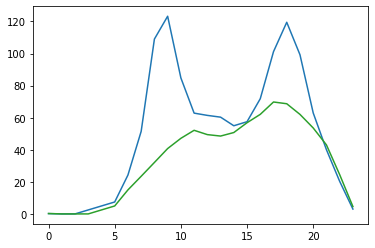

In [14]:
df["Weekday"] = df["Datetime"].dt.day_name()
avg = df.groupby(["Weekday", "Hour"])["Entry Count"].mean().reset_index()
for day in ["Monday", ..., "Sunday"]:
    plt.plot(avg[avg["Weekday"] == day]["Hour"], avg[avg["Weekday"] == day]["Entry Count"], label=day)


<AxesSubplot:xlabel='Hour', ylabel='Entry Count'>

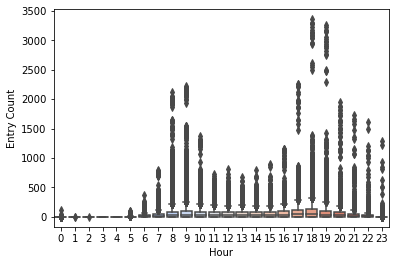

In [15]:
sns.boxplot(x="Hour", y="Entry Count", data=df, palette="coolwarm")

<AxesSubplot:xlabel='Day', ylabel='Hour'>

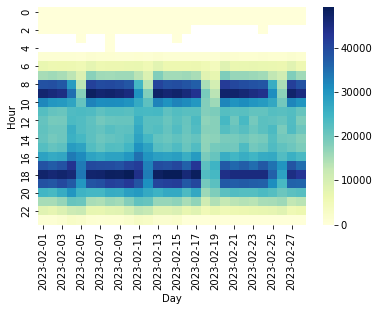

In [16]:
df["Hour"] = df["Datetime"].dt.hour
df["Day"] = df["Datetime"].dt.date
sns.heatmap(df.pivot_table(values="Entry Count", index="Hour", columns="Day", aggfunc="sum"), cmap="YlGnBu")


In [17]:
df

,entry_lineid_sttnid,Entry Count,Entry Station Code,Datetime,Hour,Weekday,Day
0,01_01,0,MYP,2023-02-01 00:00:00,0,Wednesday,2023-02-01
1,01_01,0,MYP,2023-02-01 00:00:00,0,Wednesday,2023-02-01
2,01_01,76,MYP,2023-02-01 05:00:00,5,Wednesday,2023-02-01
3,01_01,15,MYP,2023-02-01 05:00:00,5,Wednesday,2023-02-01
4,01_01,379,MYP,2023-02-01 06:00:00,6,Wednesday,2023-02-01
...,...,...,...,...,...,...,...
201269,03_23,0,RDG,2023-02-18 00:00:00,0,Saturday,2023-02-18
201270,03_23,0,RDG,2023-02-18 00:00:00,0,Saturday,2023-02-18
201271,03_23,0,RDG,2023-02-18 00:00:00,0,Saturday,2023-02-18
201272,03_23,0,RDG,2023-02-18 00:00:00,0,Saturday,2023-02-18


#### ARIMA BLueprint

Aggregate data to daily totals

Plot to check trend/stationarity

Test for stationarity (ADF test)

Difference the data if non-stationary

Plot ACF & PACF to estimate (p, d, q)

Fit ARIMA(p, d, q)

Forecast and visualize

Evaluate performance with metrics like MAE, RMSE

In [18]:
# Step 1: Aggregate to daily total
daily_df = df.groupby(df["Datetime"].dt.date)["Entry Count"].sum()
daily_df.index = pd.to_datetime(daily_df.index)

<AxesSubplot:title={'center':'Daily Passenger Entries'}, xlabel='Datetime'>

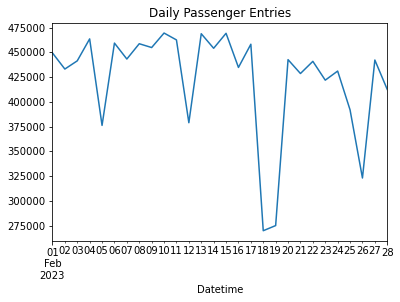

In [19]:
# Step 2: Plot
daily_df.plot(title="Daily Passenger Entries")

In [20]:
# Step 3: ADF Test
result = adfuller(daily_df)
print(f"ADF Statistic: {result[0]}, p-value: {result[1]}")

ADF Statistic: -3.9309522670628576, p-value: 0.001818502915958077


In [21]:
#just plotting to see
#plot_acf(diff); plot_pacf(diff); plt.show()

In [22]:
model = ARIMA(daily_df, order=(1, 0, 1), freq ='D')
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            Entry Count   No. Observations:                   28
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -343.571
Date:                Sat, 17 May 2025   AIC                            695.141
Time:                        16:23:53   BIC                            700.470
Sample:                    02-01-2023   HQIC                           696.770
                         - 02-28-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.235e+05   1.42e+04     29.869      0.000    3.96e+05    4.51e+05
ar.L1         -0.0700      1.105     -0.063      0.950      -2.236       2.096
ma.L1          0.3256      1.054      0.309      0.7

C:\Users\china\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [23]:
# Step 7: Forecast next 7 days
forecast = model_fit.forecast(steps=7)
forecast.index = pd.date_range(start=daily_df.index[-1] + pd.Timedelta(days=1), periods=7)
print(forecast)

2023-03-01    416703.717363
2023-03-02    423947.069494
2023-03-03    423440.126869
2023-03-04    423475.606412
2023-03-05    423473.123295
2023-03-06    423473.297082
2023-03-07    423473.284919
Freq: D, Name: predicted_mean, dtype: float64


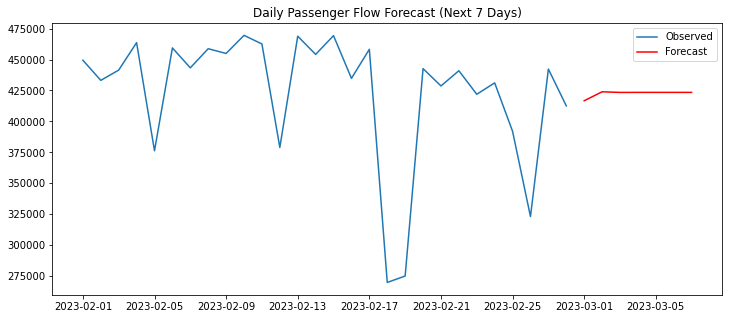

In [24]:
# Step 8: Plot Forecast
plt.figure(figsize=(12, 5))
plt.plot(daily_df, label="Observed")
plt.plot(forecast, label="Forecast", color='red')
plt.title("Daily Passenger Flow Forecast (Next 7 Days)")
plt.legend()
plt.show()

# Sarima

In [28]:
# Fit SARIMA model to Series
import warnings
warnings.filterwarnings("ignore", module="statsmodels")
sarima_model = SARIMAX(
    daily_df,
    order=(1, 0, 1),
    seasonal_order=(1, 1, 1, 7),
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_result = sarima_model.fit()

In [29]:
# Forecast next 7 days
sarima_forecast = sarima_result.forecast(steps=7)
sarima_forecast.index = pd.date_range(start=daily_df.index[-1] + pd.Timedelta(days=1), periods=7)
print(sarima_forecast)


2023-03-01    449182.009928
2023-03-02    423004.874505
2023-03-03    441798.692652
2023-03-04    318145.066207
2023-03-05    292512.327412
2023-03-06    439649.449846
2023-03-07    420034.667559
Freq: D, Name: predicted_mean, dtype: float64


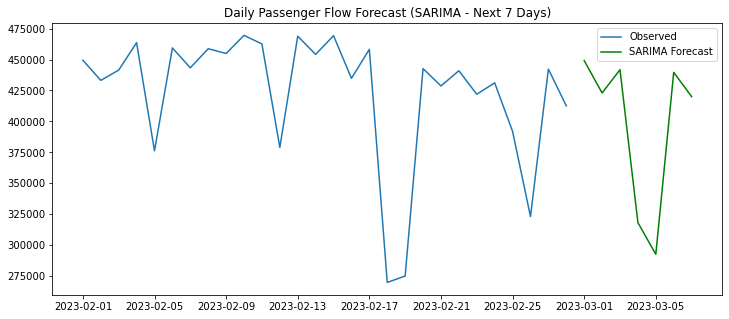

In [30]:
# Plot
plt.figure(figsize=(12, 5))
plt.plot(daily_df, label="Observed")
plt.plot(sarima_forecast, label="SARIMA Forecast", color="green")
plt.title("Daily Passenger Flow Forecast (SARIMA - Next 7 Days)")
plt.legend()
plt.show()

#### Evaluation

In [34]:
daily_df.head()
print(daily_df.columns)

AttributeError: 'Series' object has no attribute 'columns'

In [35]:
daily_df = daily_df.to_frame(name="Entry Count")


In [36]:
# Step 1: Train-Test Split
train = daily_df.iloc[:21]
test = daily_df.iloc[21:]  # Last 7 days

In [37]:
# Step 2: Fit SARIMA model on training data
sarima_model = SARIMAX(
    train['Entry Count'],
    order=(1, 0, 1),
    seasonal_order=(1, 1, 1, 7),
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarima_result = sarima_model.fit()

In [38]:
# Step 3: Forecast
forecast = sarima_result.forecast(steps=len(test))
forecast.index = test.index

In [39]:
mae = mean_absolute_error(test, forecast)
rmse = mean_squared_error(test, forecast, squared=False)

In [40]:
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 791206.27
RMSE: 1214290.92


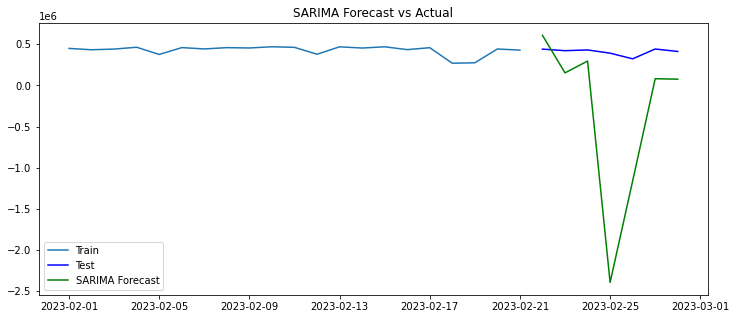

In [41]:
plt.figure(figsize=(12, 5))
plt.plot(train, label="Train")
plt.plot(test, label="Test", color="blue")
plt.plot(forecast, label="SARIMA Forecast", color="green")
plt.title("SARIMA Forecast vs Actual")
plt.legend()
plt.show()
